# Flower recognition
The goal of this exercise is to introduce the most Logistic Regression classifier

## Tasks:
1. Load data
2. Visualise data
3. Train a model
4. Evaluate the model

In [20]:
# Dataprocessing tool
import pandas as pd

# Matrix operations
import numpy as np

# Visualisation libs
import seaborn as sns

# Dataset
from sklearn.datasets import load_iris

# Lets use magic to include figure in the notebooks
%matplotlib notebook 

## 1. Load data

In [5]:
iris = load_iris()

In [46]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

## 2. Visualise data

In [14]:
# Some datahacking to make a Pandas DataFrame
df = pd.DataFrame(np.hstack((iris.data, iris.target.reshape(-1,1))), columns=iris.feature_names + ['class'])

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


<IPython.core.display.Javascript object>


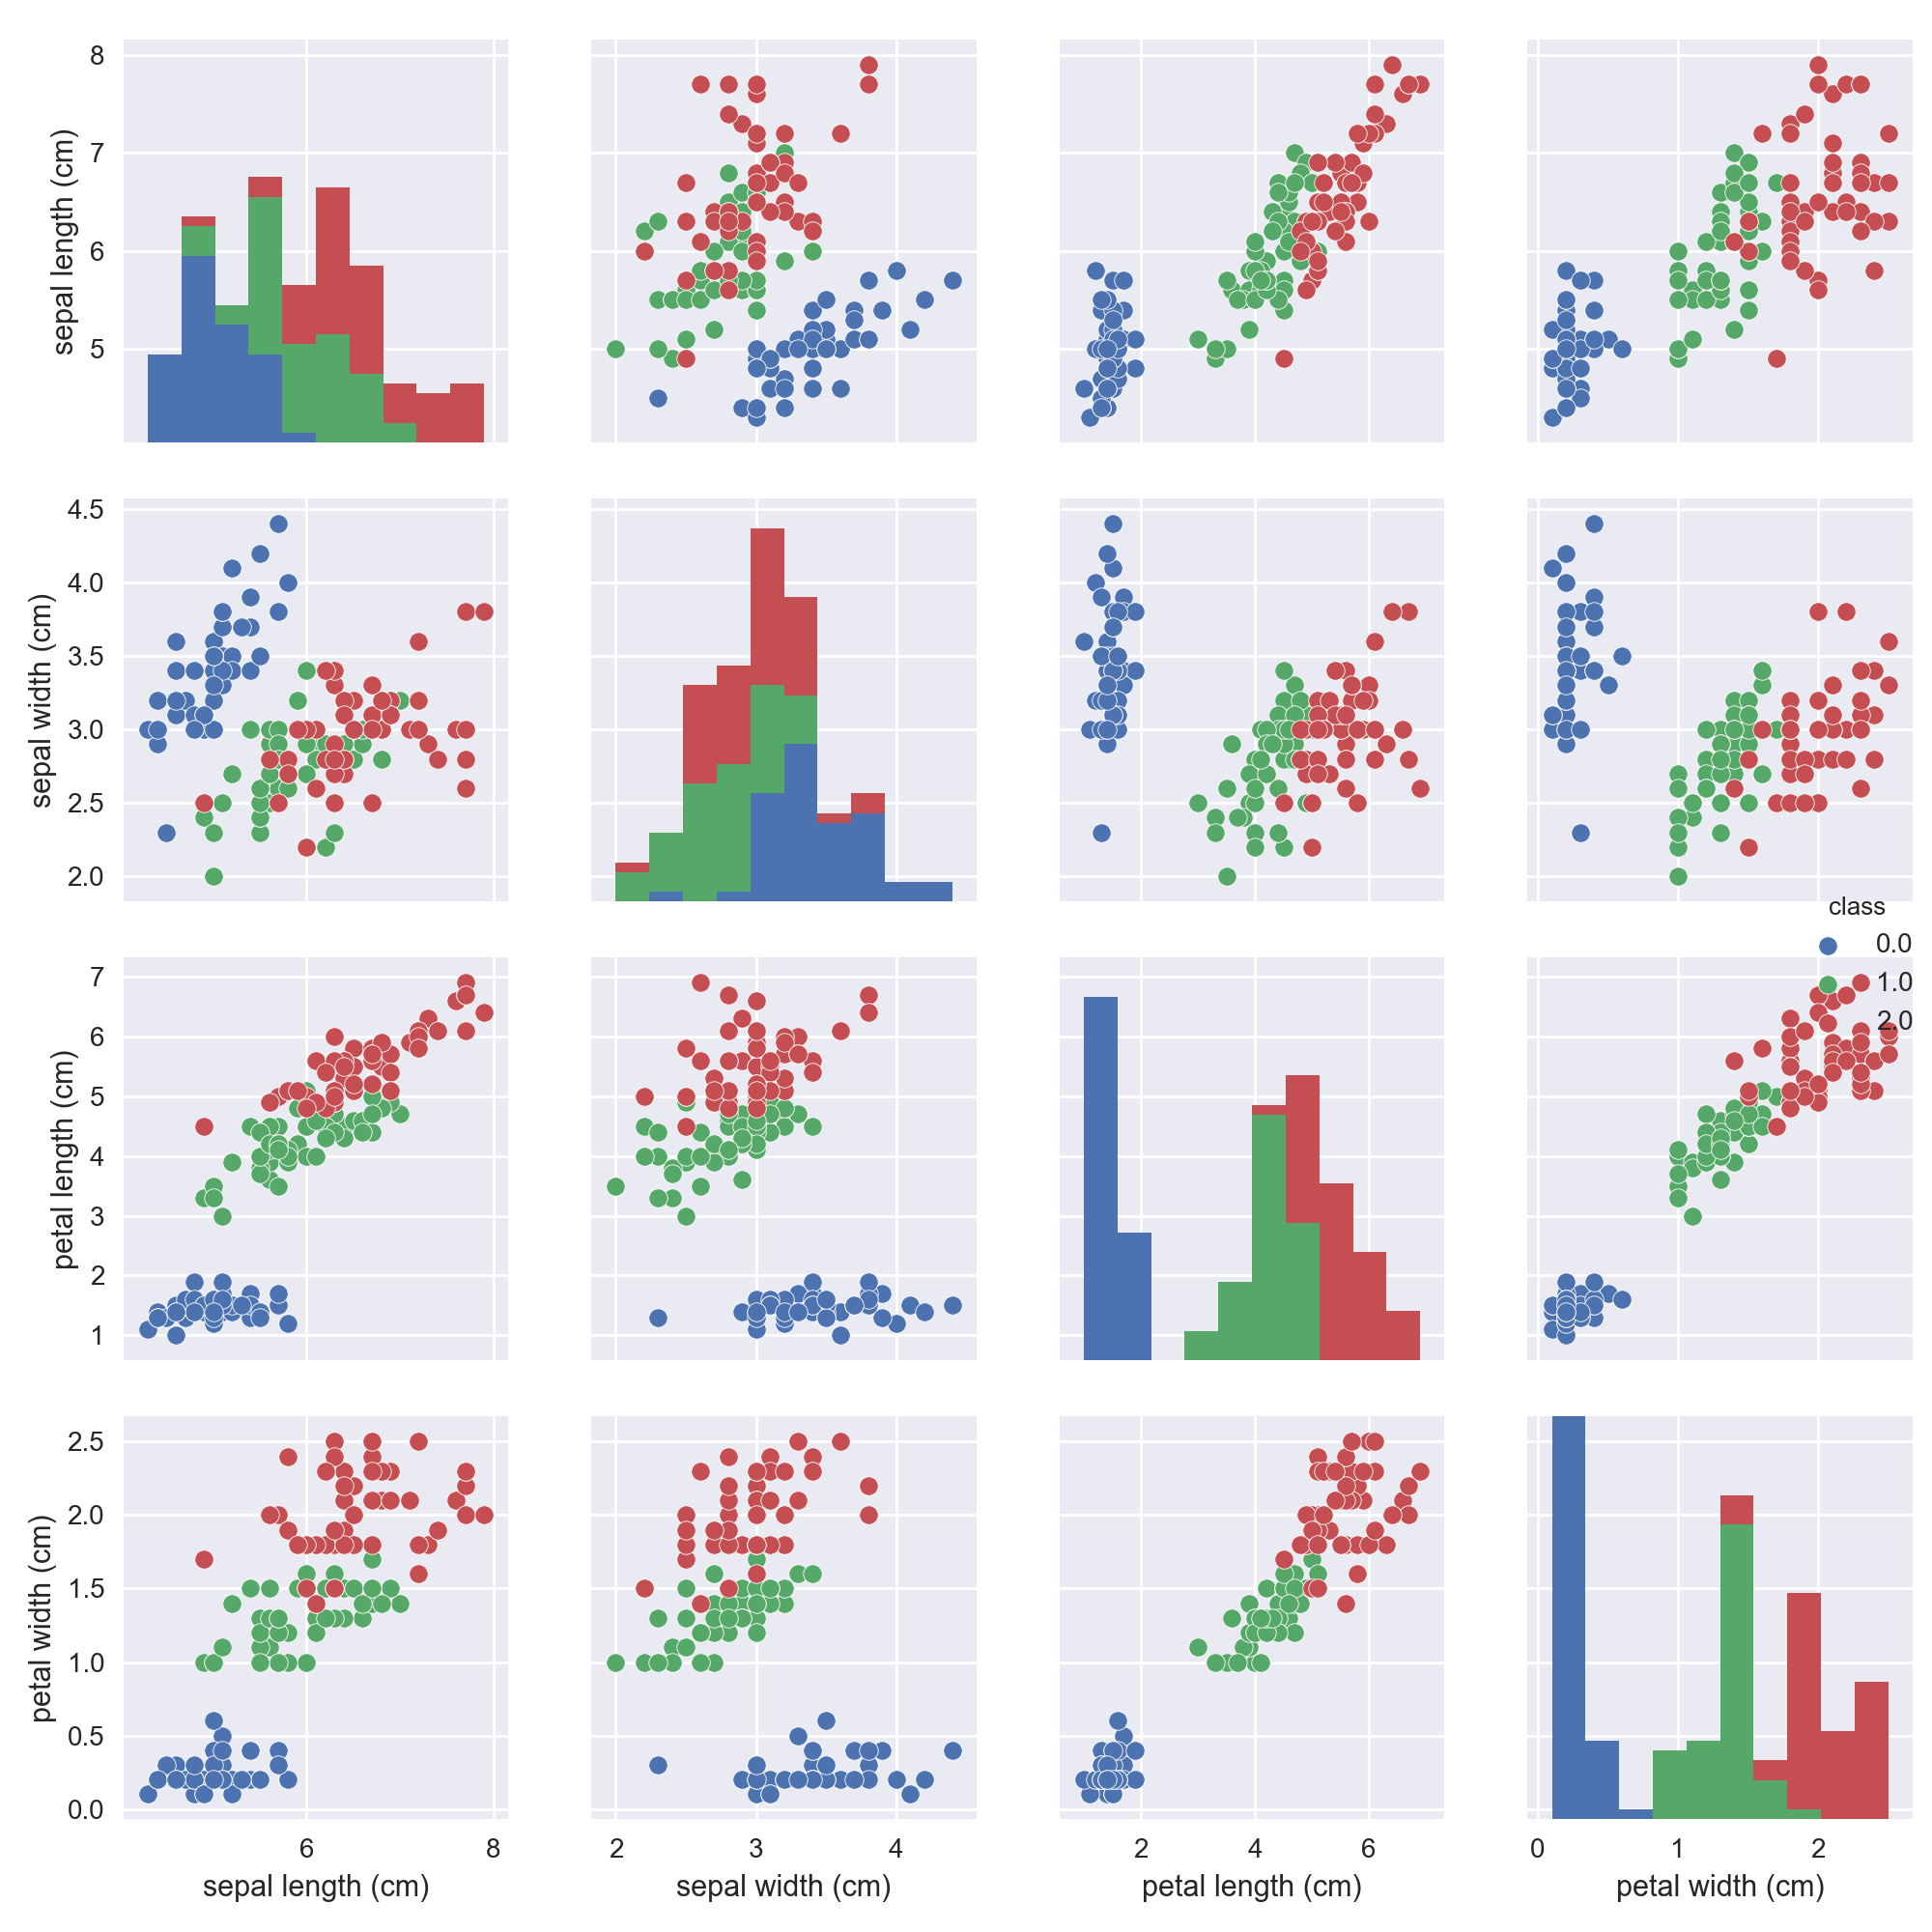

In [47]:
sns.pairplot(data=df, vars=iris.feature_names, hue='class')

## 3. Train a model

### Train and test split
We need to split dataset into training and testing set in order to evaluate the model. Training set will be used for training the model and testing set for evaluating it.

In [22]:
from sklearn.cross_validation import train_test_split

In [48]:
# X_train are the features for training set
# X_test are the features for targets set
# y_train are the targets for training set
# y_test are the targets for testing set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [25]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

### Train a model

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4. Evaluate the model

In [31]:
from sklearn.metrics import accuracy_score, classification_report, precision_score

### For training data (sanity check)

In [33]:
y_train_pred = clf.predict(X_train)

In [34]:
accuracy_score(y_train, y_train_pred)

0.94999999999999996

In [43]:
print(classification_report(y_train, y_train_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        39
 versicolor       0.97      0.88      0.92        40
  virginica       0.89      0.98      0.93        41

avg / total       0.95      0.95      0.95       120



### For testing data (actual model evaluation)

In [36]:
y_test_pred = clf.predict(X_test)

In [37]:
accuracy_score(y_test, y_test_pred)

1.0

In [42]:
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      1.00      1.00        10
  virginica       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        30

